# 데이터 불러오기

In [ ]:
! pip3 install koreanize_matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [ ]:
log_2022_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/데이터 분석 중급 프로젝트_1/원본 데이터/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/log_2022.csv"
log_2023_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/데이터 분석 중급 프로젝트_1/원본 데이터/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/log_2023.csv"

In [ ]:
log_2022_df = pd.read_csv(log_2022_path)
log_2022_df.head(2)

,Unnamed: 0,user_uuid,URL,timestamp,date,response_code,method
0,0,8a7e70cd-1630-4a8a-8303-0706af3a7908,api/search/language?name=한국어&_=1655915651225,2022-06-22 16:42:48.247454 UTC,2022-06-23,200,GET
1,1,8a7e70cd-1630-4a8a-8303-0706af3a7908,api/signup/form,2022-06-22 16:19:07.770741 UTC,2022-06-23,200,POST


In [ ]:
# 1. UTC 제거
log_2022_df["timestamp_clean"] = log_2022_df["timestamp"].str.replace(" UTC", "", regex=False)

# 2. datetime으로 변환
log_2022_df["timestamp_clean"] = pd.to_datetime(
    log_2022_df["timestamp_clean"],
    format='%Y-%m-%d %H:%M:%S.%f',
    errors='coerce'
)

# 3. NaT가 생긴 경우, 포맷이 다른 문자열을 다시 처리 (마이크로초 없는 경우 등)
mask_failed = log_2022_df["timestamp_clean"].isna()
log_2022_df.loc[mask_failed, "timestamp_clean"] = pd.to_datetime(
    log_2022_df.loc[mask_failed, "timestamp"].str.replace(" UTC", "", regex=False),
    format="%Y-%m-%d %H:%M:%S",
    errors="coerce"
)

# 4. 정리
log_2022_df["timestamp"] = log_2022_df["timestamp_clean"]
log_2022_df.drop(columns="timestamp_clean", inplace=True)

In [ ]:
log_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10054124 entries, 0 to 10054123
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Unnamed: 0     int64         
 1   user_uuid      object        
 2   URL            object        
 3   timestamp      datetime64[ns]
 4   date           object        
 5   response_code  int64         
 6   method         object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 536.9+ MB


In [ ]:
log_2023_df = pd.read_csv(log_2023_path)
log_2023_df.head(2)

,Unnamed: 0,user_uuid,URL,timestamp,date,response_code,method
0,0,5ce8f5ca-3476-4623-a60c-00c98eef3b62,@user_id,2023-12-29 13:19:50.230356 UTC,2023-12-29,200,GET
1,1,5ce8f5ca-3476-4623-a60c-00c98eef3b62,api/users/notifications/mark_read?id=6425064&_...,2023-12-29 13:20:17.848762 UTC,2023-12-29,200,GET


In [ ]:
# 1. UTC 제거
log_2023_df["timestamp_clean"] = log_2023_df["timestamp"].str.replace(" UTC", "", regex=False)

# 2. datetime으로 변환
log_2023_df["timestamp_clean"] = pd.to_datetime(
    log_2023_df["timestamp_clean"],
    format='%Y-%m-%d %H:%M:%S.%f',
    errors='coerce'
)

# 3. NaT가 생긴 경우, 포맷이 다른 문자열을 다시 처리 (마이크로초 없는 경우 등)
mask_failed = log_2023_df["timestamp_clean"].isna()
log_2023_df.loc[mask_failed, "timestamp_clean"] = pd.to_datetime(
    log_2023_df.loc[mask_failed, "timestamp"].str.replace(" UTC", "", regex=False),
    format="%Y-%m-%d %H:%M:%S",
    errors="coerce"
)

# 4. 정리
log_2023_df["timestamp"] = log_2023_df["timestamp_clean"]
log_2023_df.drop(columns="timestamp_clean", inplace=True)

In [ ]:
log_2023_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7187783 entries, 0 to 7187782
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Unnamed: 0     int64         
 1   user_uuid      object        
 2   URL            object        
 3   timestamp      datetime64[ns]
 4   date           object        
 5   response_code  int64         
 6   method         object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 383.9+ MB


# 로그 기반 분석

## 1. 유저 진입 경로 분석 (URL 분포 확인)

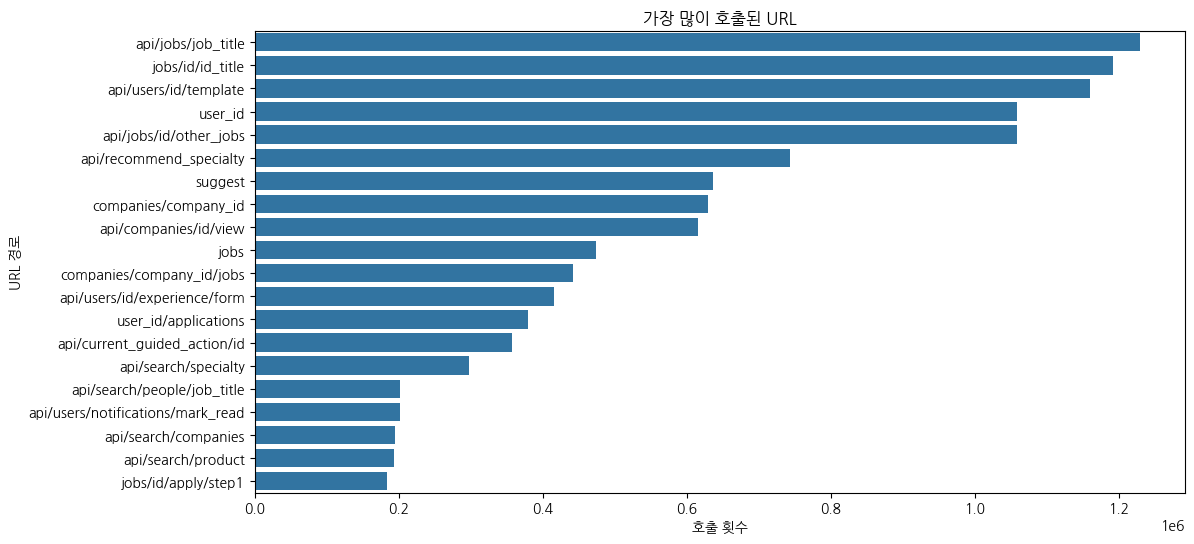

In [ ]:
log_df = pd.concat([log_2022_df, log_2023_df])
log_df["clean_url"] = log_df["URL"].str.extract(r"([a-zA-Z0-9/_-]+)")  # 불필요한 파라미터 제거

# 상위 URL 경로 확인
entry_points = log_df["clean_url"].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=entry_points.values, y=entry_points.index)
plt.title("가장 많이 호출된 URL")
plt.xlabel("호출 횟수")
plt.ylabel("URL 경로")
plt.show()

## 2. 가장 많이 호출되는 API (인기 기능)

In [ ]:
api_calls = log_df["clean_url"].value_counts().reset_index()
api_calls.columns = ["URL", "count"]
api_calls.head(10)

,URL,count
0,api/jobs/job_title,1230149
1,jobs/id/id_title,1192336
2,api/users/id/template,1160106
3,user_id,1059268
4,api/jobs/id/other_jobs,1058870
5,api/recommend_specialty,743458
6,suggest,636320
7,companies/company_id,630110
8,api/companies/id/view,615331
9,jobs,474709


## 3. 북마크 → 실제 지원 전환율

In [ ]:
# 날짜 컬럼 변환
application_df["application_date"] = pd.to_datetime(application_df["cdate"], format="mixed", errors="coerce")
job_bookmark_df["bookmark_date"] = pd.to_datetime(job_bookmark_df["cdate"], format="mixed", errors="coerce")

# 병합: 유저-공고 조합 기준
merged_df = pd.merge(job_bookmark_df, application_df, on=["user_uuid", "job_uuid"], how="left")

# 실제 지원 여부 확인
merged_df["applied"] = merged_df["application_uuid"].notnull()

# 전환율 계산
conversion_rate = merged_df["applied"].mean() * 100
print(f"북마크 → 지원 전환율: {conversion_rate:.2f}%")

북마크 → 지원 전환율: 8.12%


## 4. 세션 흐름 및 이탈 시점 분석

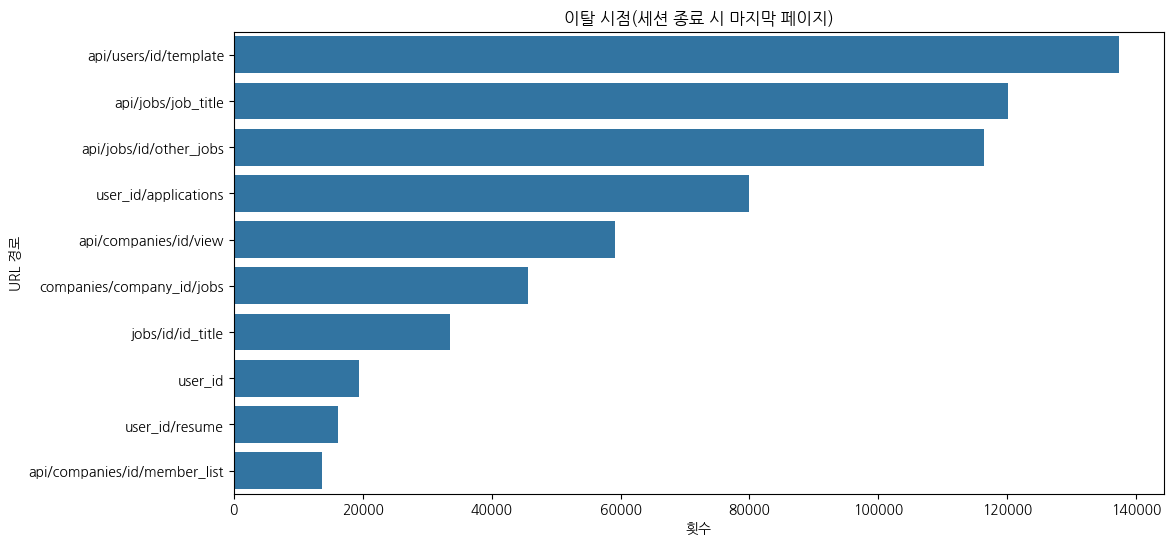

In [ ]:
log_df["timestamp"] = pd.to_datetime(log_df["timestamp"])
log_df = log_df.sort_values(["user_uuid", "timestamp"])

# 세션 구분 (30분 이상 차이 날 경우 새 세션으로)
log_df["prev_time"] = log_df.groupby("user_uuid")["timestamp"].shift(1)
log_df["time_diff"] = (log_df["timestamp"] - log_df["prev_time"]).dt.total_seconds()
log_df["new_session"] = (log_df["time_diff"] > 1800) | (log_df["time_diff"].isna())
log_df["session_id"] = log_df.groupby("user_uuid")["new_session"].cumsum()

# 마지막에 어떤 페이지에서 머물렀는지 확인 (이탈 추정)
last_pages = log_df.groupby(["user_uuid", "session_id"]).tail(1)
exit_page_counts = last_pages["clean_url"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=exit_page_counts.values, y=exit_page_counts.index)
plt.title("이탈 시점(세션 종료 시 마지막 페이지)")
plt.xlabel("횟수")
plt.ylabel("URL 경로")
plt.show()